<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/DEEP_Learnig_model_for_regression_on_housing_dataset_using_keras_%26tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl


In [5]:
%matplotlib inline

In [6]:
import tensorflow as tf
from tensorflow import keras

In [11]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

NO of instances = 20640

no of attributes = 8

In [16]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [22]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
X_train.shape

(11610, 8)

In [33]:
# prompt: carate a neural network for this dataset with 2 layes and 1 output layer

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])



In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# prompt: complie model

model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["mae"])


In [44]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3981 - mae: 0.4527 - val_loss: 0.4506 - val_mae: 0.4900
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3952 - mae: 0.4499 - val_loss: 0.4515 - val_mae: 0.4951
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3925 - mae: 0.4488 - val_loss: 0.4467 - val_mae: 0.4879
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3895 - mae: 0.4465 - val_loss: 0.4473 - val_mae: 0.4922
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3874 - mae: 0.4450 - val_loss: 0.4429 - val_mae: 0.4860
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3847 - mae: 0.4434 - val_loss: 0.4414 - val_mae: 0.4839
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3831 - mae: 0.4419 - val_loss: 0.4405 - val_mae: 0.4850
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [45]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3827 - mae: 0.4471


In [46]:
model_history.history

{'loss': [0.3980976343154907,
  0.39515015482902527,
  0.3924795091152191,
  0.38946840167045593,
  0.3873898983001709,
  0.3847424387931824,
  0.383108526468277,
  0.38130664825439453,
  0.37947747111320496,
  0.37798011302948,
  0.37695157527923584,
  0.375601589679718,
  0.3743956983089447,
  0.3731591999530792,
  0.3721793591976166,
  0.37095022201538086,
  0.370133638381958,
  0.3694566786289215,
  0.36802467703819275,
  0.3675591051578522],
 'mae': [0.4526974856853485,
  0.44992080330848694,
  0.44879090785980225,
  0.44648003578186035,
  0.4450313448905945,
  0.44341975450515747,
  0.4418867230415344,
  0.44069090485572815,
  0.4398563802242279,
  0.4382685124874115,
  0.43710827827453613,
  0.43610960245132446,
  0.43538299202919006,
  0.4342816472053528,
  0.4336966276168823,
  0.4329570531845093,
  0.43209052085876465,
  0.4315674901008606,
  0.43030476570129395,
  0.42979714274406433],
 'val_loss': [0.45057353377342224,
  0.4514619708061218,
  0.44674617052078247,
  0.447306

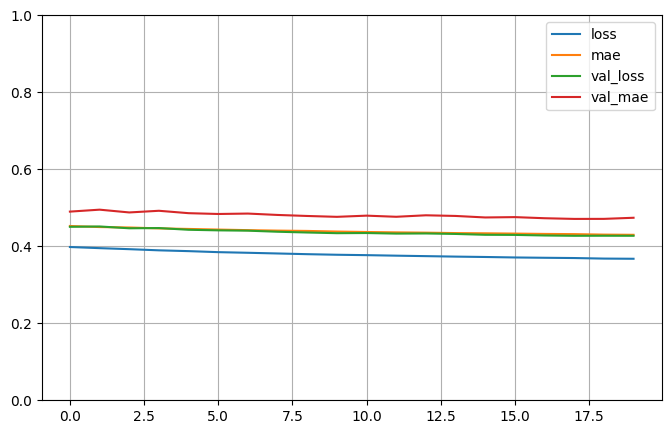

In [47]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [49]:
X_new = X_test[:3]

In [51]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_pred[:3])

1/1 [==============================] - 0s 24ms/step
[[0.8219778]
 [1.8128247]
 [4.1836796]]
[[0.8219778]
 [1.8128247]
 [4.1836796]]
